### Importing Packages

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [3]:
car = pd.read_csv('cars-dataset.csv')

### Preprocessing 

In [4]:
col = car.columns.values
car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
car1 = car.drop(columns='car name',axis = 1)

In [6]:
car1[car1.applymap(np.isreal).all(1)]

,cyl,disp,hp,wt,acc,yr,mpg


In [7]:
car1 = car1.replace(to_replace='?',value=np.NaN)

In [8]:
car1.isnull().sum()

cyl     0
disp    0
hp      6
wt      0
acc     0
yr      0
mpg     0
dtype: int64

#### Replacing missing value

In [9]:
from sklearn.preprocessing import Imputer

In [10]:
impute = Imputer(strategy='mean',axis=0)
car1 = impute.fit_transform(car1)

In [11]:
car1 = pd.DataFrame(car1)

In [12]:
car1.head()
car1.columns = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg']

,0,1,2,3,4,5,6
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0


In [13]:
car1.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


#### Scatter plot and heatmap analysis

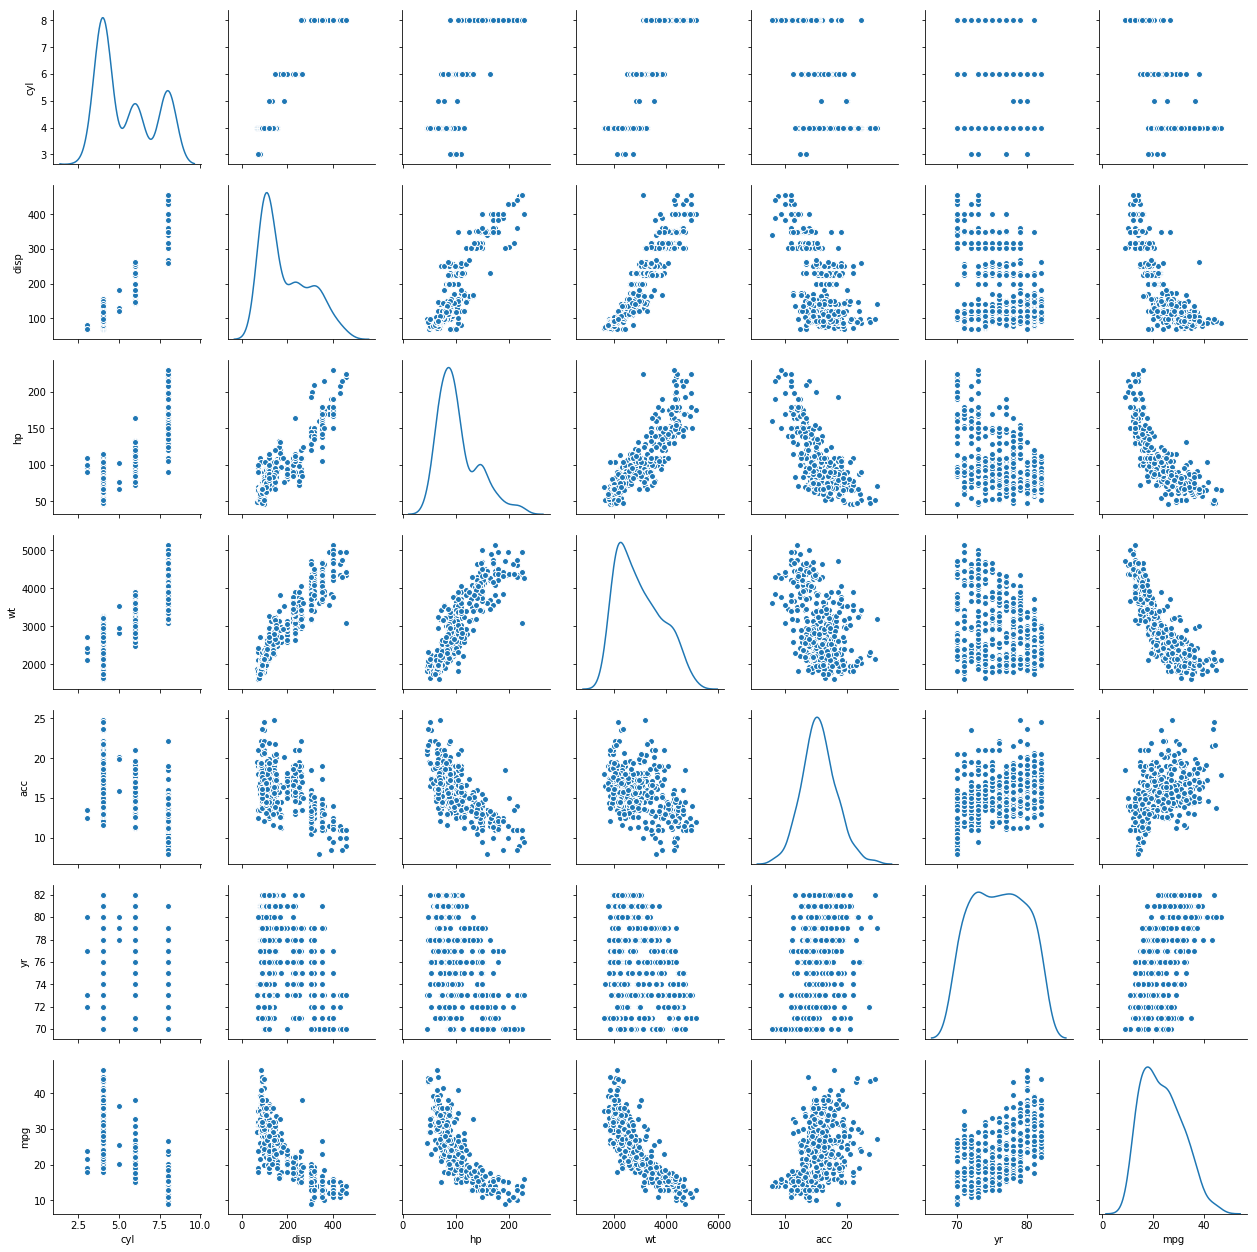

In [14]:
sns.pairplot(data=car1,diag_kind='kde')

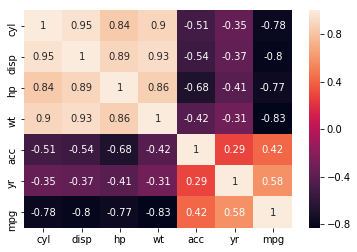

In [15]:
sns.heatmap(data=car1.corr(),annot = True)

/home/jd/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


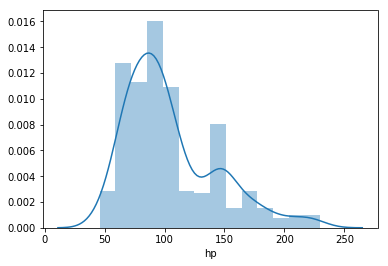

In [16]:
sns.distplot(car1['hp'])

/home/jd/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


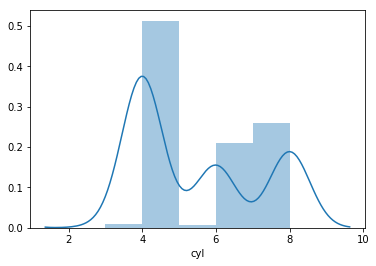

In [17]:
sns.distplot(car1['cyl'])

In [18]:
car1.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

### Zscore scaling

In [19]:
from scipy.stats import zscore

In [20]:
car1_scale = car1.apply(zscore)

In [21]:
car1_scale.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.834543


### Kmean clustering

In [22]:
from sklearn.cluster import KMeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Text(0.5,1,'The Elbow Method')

Text(0.5,0,'Number of clusters')

Text(0,0.5,'WCSS')

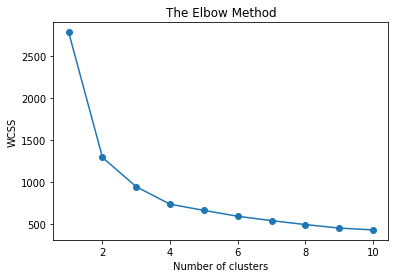

In [36]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(car1_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(car1_scale)

#### Creating Dataset as per cluster

In [25]:
centroid  = kmeans.cluster_centers_

In [26]:
pred = kmeans.predict(car1_scale)

In [27]:
car2 = car1.copy()

In [28]:
car2['group'] = pred

In [29]:
car2.groupby(by='group').count()

,cyl,disp,hp,wt,acc,yr,mpg
group,,,,,,,
0,101,101,101,101,101,101,101
1,90,90,90,90,90,90,90
2,113,113,113,113,113,113,113
3,94,94,94,94,94,94,94


In [30]:
car_cluster1 = car2[car2.group == 0]
car_cluster2 = car2[car2.group == 1]
car_cluster3 = car2[car2.group == 2]
car_cluster4 = car2[car2.group == 3]

#### Applying Linear regression  

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### Model1/Cluster1

In [32]:
x = car_cluster1.drop(columns='mpg',axis =1)
y = car_cluster1.loc[:,['mpg']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =.70)
model1 = LinearRegression()
model1.fit(x_train,y_train)

print (' Coeff = ',model1.coef_ , '\n','Intercept  = ',model1.intercept_)
print ('Accuracy_score = ',model1.score(x_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

 Coeff =  [[ 1.88384843 -0.02004214 -0.02531191 -0.00636669 -0.10309834  0.31972314
   0.        ]] 
 Intercept  =  [14.82545828]
Accuracy_score =  0.5850500734206937


##### Model2/Cluster2

In [33]:
x = car_cluster2.drop(columns='mpg',axis =1)
y = car_cluster2.loc[:,['mpg']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =.70)
model2 = LinearRegression()
model2.fit(x_train,y_train)

print ('coeff = ',model2.coef_ , 'intercept  = ',model2.intercept_)
print ('accuracy_score = ',model2.score(x_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

coeff =  [[ 0.67716484  0.001151   -0.02883389 -0.00375422 -0.1831457   0.56147218
   0.        ]] intercept  =  [-9.40989859]
accuracy_score =  0.4821686845246967


##### Model3/Cluster3

In [34]:
x = car_cluster3.drop(columns='mpg',axis =1)
y = car_cluster3.loc[:,['mpg']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =.70)
model3 = LinearRegression()
model3.fit(x_train,y_train)

print ('coeff = ',model3.coef_ , 'intercept  = ',model3.intercept_)
print ('accuracy_score = ',model3.score(x_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

coeff =  [[ 7.12134435e+00 -6.78322847e-02 -2.67732330e-02 -5.29588045e-03
   1.16420631e-01  5.01980133e-01  0.00000000e+00]] intercept  =  [-16.05754259]
accuracy_score =  0.4775925437856968


##### Model4/Cluster4

In [35]:
x = car_cluster4.drop(columns='mpg',axis =1)
y = car_cluster4.loc[:,['mpg']]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =.70)
model4 = LinearRegression()
model4.fit(x_train,y_train)

print ('coeff = ',model4.coef_ , 'intercept  = ',model4.intercept_)
print ('accuracy_score = ',model4.score(x_test,y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

coeff =  [[ 0.         -0.01078112 -0.00695175 -0.00124327 -0.55036108  0.40517932
   0.        ]] intercept  =  [1.80327858]
accuracy_score =  0.3656549177471039
